# Optimasi Rute Transportasi Umum Untuk Efisiensi Layanan & Pengurangan Emisi Karbon

> ## Topik:
Studi kasus mengenai **optimasi rute transportasi publik (KRL Jabodetabek)** menggunakan dua pendekatan algoritmik, yaitu **algoritma iteratif *Dijkstra*** dan **algoritma rekursif *DFS (Depth-First Search)***. Pada program ini akan dilakukan 2 kali simulasi, yaitu pada Rute KRL Jabodetabek (graf statis) dan graf dinamis untuk melihat perbandingan **input size (n).**

> ## Anggota Kelompok
- Nur Shabrina Muslim (103052300035)
- Farand Diy Dat Mahazalfaa (103052300050)



## 1. Langkah Awal: Menggambarkan Graf Rute KRL Jabodetabek menggunakan Networkx dan Matplotlib

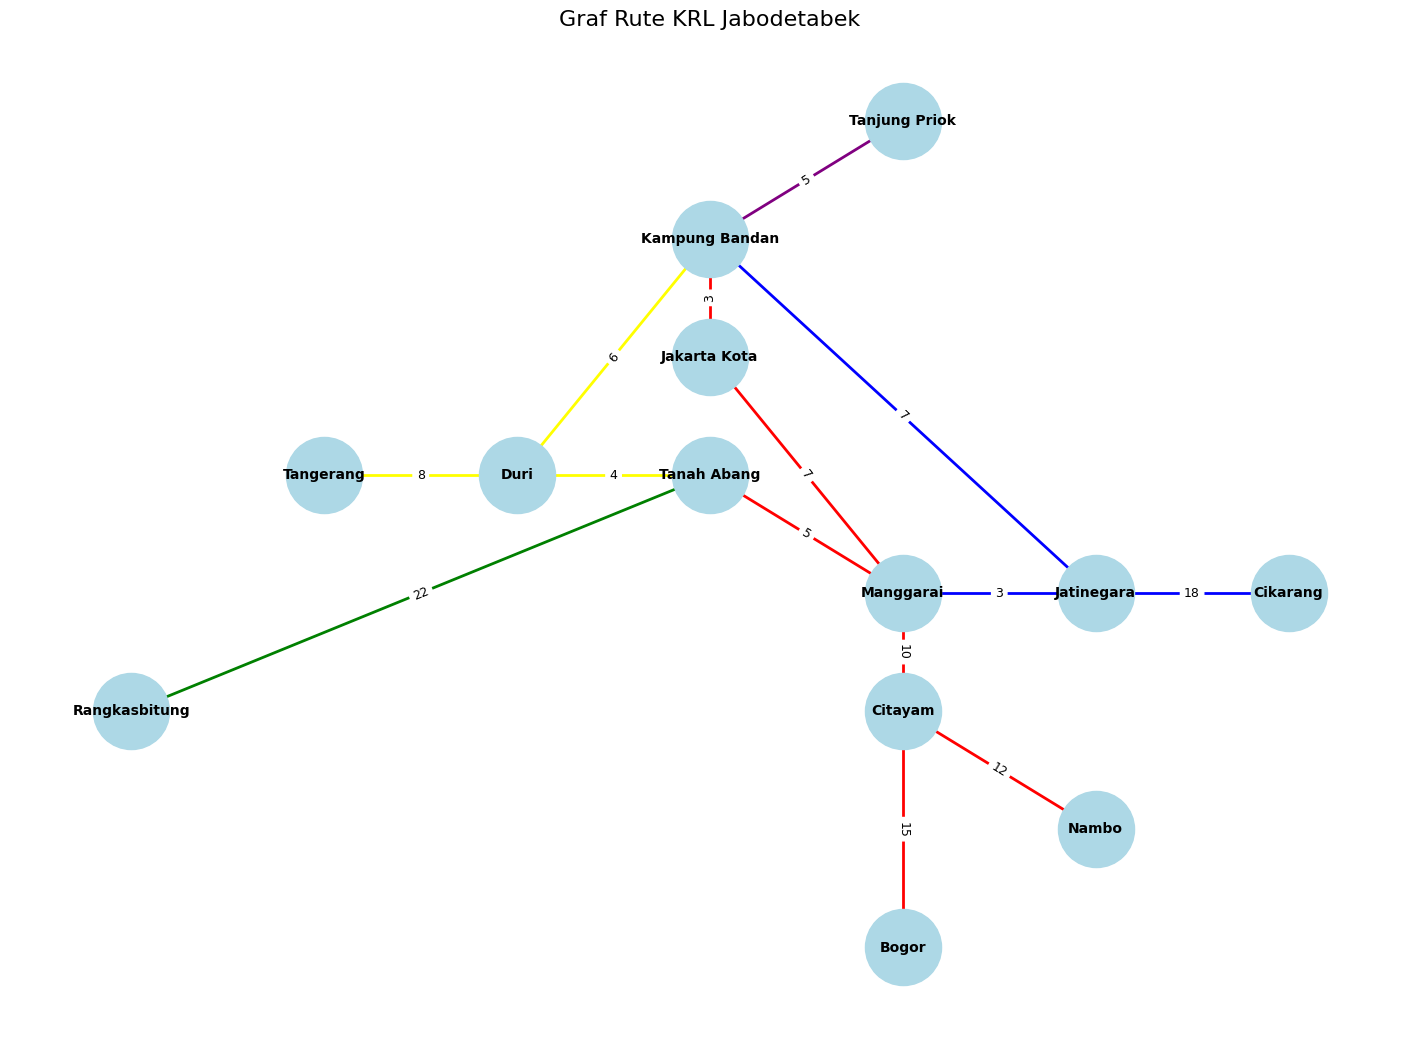

In [294]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf rute KRL
def create_static_krl_graph():
    G = nx.Graph()

    # Node (Stasiun utama/transit)
    stations = [
        "Tangerang", "Duri", "Tanah Abang", "Rangkasbitung",
        "Manggarai", "Jakarta Kota", "Jatinegara", "Cikarang",
        "Kampung Bandan", "Tanjung Priok", "Citayam", "Bogor", "Nambo"
    ]
    for station in stations:
        G.add_node(station)

    # Edge (Hubungan antar stasiun dengan jarak rata-rata dan warna jalur)
    edges = [
        ("Tangerang", "Duri", 8, 'yellow'),  # Tangerang Line
        ("Duri", "Tanah Abang", 4, 'yellow'),  # Tangerang Line
        ("Tanah Abang", "Rangkasbitung", 22, 'green'),  # Rangkasbitung Line
        ("Tanah Abang", "Manggarai", 5, 'red'),  # Bogor Line
        ("Manggarai", "Jakarta Kota", 7, 'red'),  # Bogor Line
        ("Manggarai", "Jatinegara", 3, 'blue'),  # Bekasi Line
        ("Jatinegara", "Cikarang", 18, 'blue'),  # Bekasi Line
        ("Jakarta Kota", "Kampung Bandan", 3, 'red'),  # Bogor Line
        ("Duri", "Kampung Bandan", 6, 'yellow'),  # Tangerang Line
        ("Jatinegara", "Kampung Bandan", 7, 'blue'),  # Bekasi Line
        ("Kampung Bandan", "Tanjung Priok", 5, 'purple'),  # Tanjung Priok Line
        ("Manggarai", "Citayam", 10, 'red'),  # Bogor Line
        ("Citayam", "Bogor", 15, 'red'),  # Bogor Line
        ("Citayam", "Nambo", 12, 'red')  # Bogor Line
    ]
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2], color=edge[3])

    return G

# Visualisasi graf
def visualize_graph(G, pos, title="Graf Rute KRL Jabodetabek"):
    plt.figure(figsize=(14, 10))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]

    nx.draw(
        G, pos, with_labels=True,
        node_color='lightblue', node_size=3000, font_size=10, font_weight='bold',
        edge_color=edge_colors, width=2
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
    plt.title(title, fontsize=16)
    plt.show()

# Visualisasi Rute KRL Jabodetabek
static_graph = create_static_krl_graph()
static_pos = {
    "Tangerang": (0, 5), "Duri": (1, 5), "Tanah Abang": (2, 5), "Rangkasbitung": (-1, 3),
    "Manggarai": (3, 4), "Jakarta Kota": (2, 6), "Jatinegara": (4, 4), "Cikarang": (5, 4),
    "Kampung Bandan": (2, 7), "Tanjung Priok": (3, 8), "Citayam": (3, 3), "Bogor": (3, 1), "Nambo": (4, 2)
}
visualize_graph(static_graph, static_pos)


>## Algoritma Iteratif Menggunakan Dijkstra Untuk Mencari Rute Terpendek

In [295]:
## Algoritma Iteratif: Dijkstra
def dijkstra(graph, start, end):
    shortest_paths = {start: (None, 0)}
    current_node = start
    visited = set()

    while current_node != end:
        visited.add(current_node)
        destinations = graph[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node, weight_dict in destinations.items():  # Changed here
            weight = weight_dict.get('weight', float('inf'))  # Fetch 'weight' from dictionary, handle missing values with infinity
            if next_node in visited:
                continue
            new_weight = weight_to_current_node + weight
            if next_node not in shortest_paths or new_weight < shortest_paths[next_node][1]:
                shortest_paths[next_node] = (current_node, new_weight)

        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return None, float('inf')
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])

    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    path.reverse()
    return path, shortest_paths[end][1]

>## Algoritma Rekursif Menggunakan DFS Untuk Mencari Semua Jalur

In [296]:
# Algoritma Rekursif: DFS untuk pencarian semua jalur
def dfs_paths(graph, start, end, path=None):
    if path is None:
        path = []
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = dfs_paths(graph, node, end, path)
            for p in new_paths:
                paths.append(p)
    return paths

>## Testing Algoritma Dijkstra (Iteratif) & DFS (Rekursif) pada Rute KRL Jabodetabek

=== Hasil Optimasi KRL Jabodetabek ===

Dijkstra (Iteratif): ['Duri', 'Tanah Abang', 'Manggarai', 'Jatinegara'] dengan biaya 12 dalam 0.000252 detik
DFS (Rekursif): 4 jalur ditemukan dalam 0.000199 detik
Jalur yang ditemukan (DFS):
  Jalur 1: Duri -> Tanah Abang -> Manggarai -> Jakarta Kota -> Kampung Bandan -> Jatinegara
  Jalur 2: Duri -> Tanah Abang -> Manggarai -> Jatinegara
  Jalur 3: Duri -> Kampung Bandan -> Jakarta Kota -> Manggarai -> Jatinegara
  Jalur 4: Duri -> Kampung Bandan -> Jatinegara




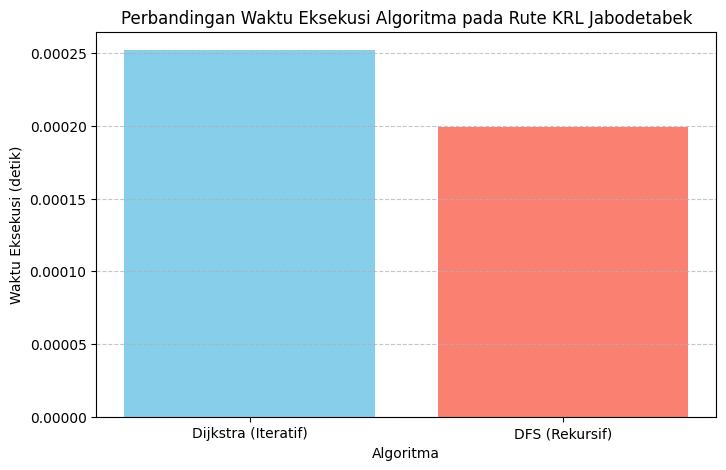

In [297]:
import matplotlib.pyplot as plt

## Testing Algoritma pada Rute KRL Jabodetabek
start_station = "Duri"
end_station = "Jatinegara"

# Dijkstra
start_time = time.time()
dijkstra_path, dijkstra_cost = dijkstra(nx.to_dict_of_dicts(static_graph), start_station, end_station)
dijkstra_time = time.time() - start_time

# DFS
start_time = time.time()
all_paths = dfs_paths(nx.to_dict_of_dicts(static_graph), start_station, end_station)
dfs_time = time.time() - start_time

# Print hasil
print("=== Hasil Optimasi KRL Jabodetabek ===\n")
print(f"Dijkstra (Iteratif): {dijkstra_path} dengan biaya {dijkstra_cost} dalam {dijkstra_time:.6f} detik")
print(f"DFS (Rekursif): {len(all_paths)} jalur ditemukan dalam {dfs_time:.6f} detik")
print("Jalur yang ditemukan (DFS):")
for i, path in enumerate(all_paths, 1):
    print(f"  Jalur {i}: {' -> '.join(path)}")

# Pemisah
print("\n")

# Visualisasi perbandingan waktu eksekusi
algorithms = ['Dijkstra (Iteratif)', 'DFS (Rekursif)']
times = [dijkstra_time, dfs_time]

plt.figure(figsize=(8, 5))
plt.bar(algorithms, times, color=['skyblue', 'salmon'])
plt.xlabel("Algoritma")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Eksekusi Algoritma pada Rute KRL Jabodetabek")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Simulasi Graf Dinamis untuk Mengetahui Kompleksitas Waktu dari Input Size N

>## Membuat dan Memvisualisasikan Graf Dinamis

In [303]:
# Membuat dan Memvisualisasikan Graf Dinamis
def visualize_graph_with_edges(graph, positions, title="Graf Dinamis KRL"):
    plt.figure(figsize=(12, 8))
    plt.title(title, fontsize=16)

    # Gambar node
    nx.draw_networkx_nodes(graph, positions, node_size=500, node_color="lightblue")
    nx.draw_networkx_labels(graph, positions, font_size=10, font_color="black")

    # Gambar edges
    edges = graph.edges(data=True)
    for u, v, data in edges:
        weight = data.get('weight', 1)
        color = data.get('color', 'black')
        nx.draw_networkx_edges(
            graph, positions,
            edgelist=[(u, v)],
            width=2,
            edge_color=color,
            alpha=0.7,
            connectionstyle="arc3,rad=0.1"  # Memberikan lengkungan pada edge
        )
        # Tambahkan label untuk bobot edge
        edge_midpoint = (
            (positions[u][0] + positions[v][0]) / 2,
            (positions[u][1] + positions[v][1]) / 2,
        )
        plt.text(
            edge_midpoint[0], edge_midpoint[1],
            str(weight),
            fontsize=8, color="darkred",
            horizontalalignment='center', verticalalignment='center'
        )

    plt.axis("off")
    plt.show()

# Input size sebagai jumlah node dinamis yang ditambahkan
input_sizes = [0, 5, 10]  # Node tambahan

> ## Iterasi untuk Visualisasi Graf Dinamis

<ipython-input-303-5baff2f0077f>:16: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


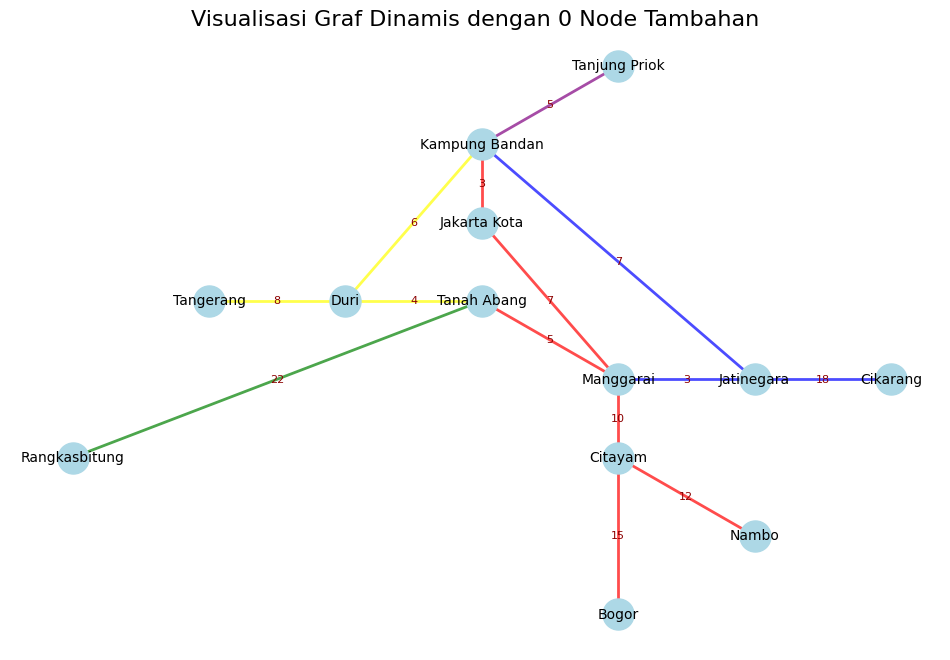


=== Graf Dinamis dengan 0 Node Tambahan ===
Jumlah Node: 13, Jumlah Edge: 14


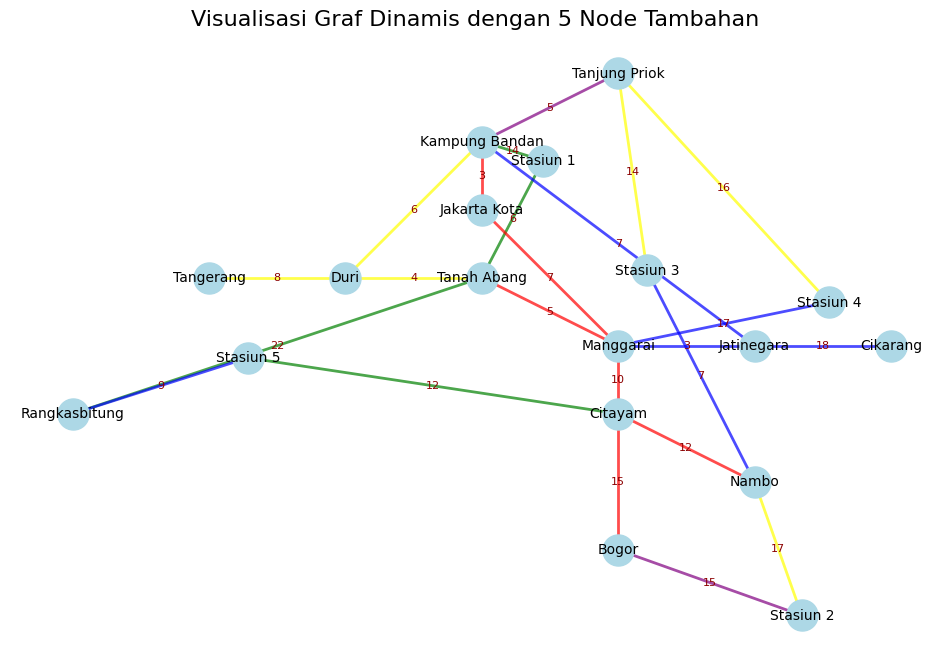


=== Graf Dinamis dengan 5 Node Tambahan ===
Jumlah Node: 18, Jumlah Edge: 24


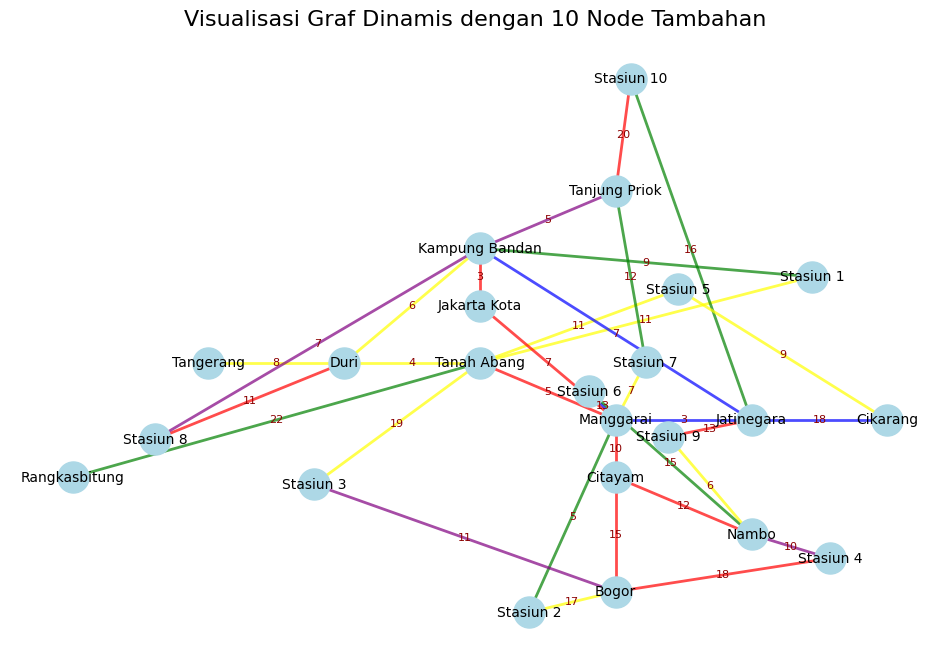


=== Graf Dinamis dengan 10 Node Tambahan ===
Jumlah Node: 23, Jumlah Edge: 34


In [304]:
for size in input_sizes:
    # Buat graf dinamis berdasarkan graf KRL statis dengan tambahan node
    dynamic_graph, dynamic_pos = create_dynamic_krl_graph(static_graph, size)

    # Visualisasi Graf Dinamis
    visualize_graph_with_edges(dynamic_graph, dynamic_pos, title=f"Visualisasi Graf Dinamis dengan {size} Node Tambahan")

    # Ukuran graf
    num_nodes = dynamic_graph.number_of_nodes()
    num_edges = dynamic_graph.number_of_edges()
    print(f"\n=== Graf Dinamis dengan {size} Node Tambahan ===")
    print(f"Jumlah Node: {num_nodes}, Jumlah Edge: {num_edges}")


>## Analisis Kompleksitas & Pengujian Algoritma Iteratif (Dijkstra) dan Rekursif (DFS)

In [307]:
dijkstra_times = []
dfs_times = []

for size in input_sizes:
    # Buat graf dinamis berdasarkan graf KRL statis dengan tambahan node
    dynamic_graph, _ = create_dynamic_krl_graph(static_graph, size)

    # Tentukan start dan end station
    start_station = random.choice((list(dynamic_graph.nodes())))
    reachable_nodes = nx.node_connected_component(dynamic_graph.to_undirected(), start_station)
    end_station = random.choice([node for node in reachable_nodes if node != start_station])

    print("=" * 50)
    print(f" Pengujian Algoritma dengan {size} Node Tambahan")
    print("=" * 50)
    print(f"Stasiun Awal: {start_station}")
    print(f"Stasiun Akhir: {end_station}\n")

    # Dijkstra
    print(">>> Hasil Dijkstra (Iteratif):")
    start_time = time.time()
    dijkstra_path, dijkstra_cost = dijkstra(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station)
    dijkstra_time = time.time() - start_time
    dijkstra_times.append(dijkstra_time)
    print(f"  Rute Terbaik : {' -> '.join(dijkstra_path)}")
    print(f"  Biaya Total  : {dijkstra_cost}")
    print(f"  Waktu Eksekusi: {dijkstra_time:.6f} detik\n")

    # DFS
    print(">>> Hasil DFS (Rekursif):")
    start_time = time.time()
    all_paths = list(dfs_paths(nx.to_dict_of_dicts(dynamic_graph), start_station, end_station))
    dfs_time = time.time() - start_time
    dfs_times.append(dfs_time)
    print(f"  Total Jalur Ditemukan : {len(all_paths)}")
    print(f"  Waktu Eksekusi        : {dfs_time:.6f} detik")
    if len(all_paths) > 0:
        print("  Contoh Jalur DFS:")
        for i, path in enumerate(all_paths[:3], 1):  # Tampilkan maksimal 3 jalur
            print(f"    Jalur {i}: {' -> '.join(path)}")
    print("\n")


 Pengujian Algoritma dengan 0 Node Tambahan
Stasiun Awal: Tangerang
Stasiun Akhir: Manggarai

>>> Hasil Dijkstra (Iteratif):
  Rute Terbaik : Tangerang -> Duri -> Tanah Abang -> Manggarai
  Biaya Total  : 17
  Waktu Eksekusi: 0.000071 detik

>>> Hasil DFS (Rekursif):
  Total Jalur Ditemukan : 3
  Waktu Eksekusi        : 0.000197 detik
  Contoh Jalur DFS:
    Jalur 1: Tangerang -> Duri -> Tanah Abang -> Manggarai
    Jalur 2: Tangerang -> Duri -> Kampung Bandan -> Jakarta Kota -> Manggarai
    Jalur 3: Tangerang -> Duri -> Kampung Bandan -> Jatinegara -> Manggarai


 Pengujian Algoritma dengan 5 Node Tambahan
Stasiun Awal: Duri
Stasiun Akhir: Cikarang

>>> Hasil Dijkstra (Iteratif):
  Rute Terbaik : Duri -> Tanah Abang -> Manggarai -> Jatinegara -> Cikarang
  Biaya Total  : 30
  Waktu Eksekusi: 0.000127 detik

>>> Hasil DFS (Rekursif):
  Total Jalur Ditemukan : 24
  Waktu Eksekusi        : 0.000411 detik
  Contoh Jalur DFS:
    Jalur 1: Duri -> Tangerang -> Stasiun 2 -> Manggarai -> Jak

> ## Perbandingan Waktu Eksekusi

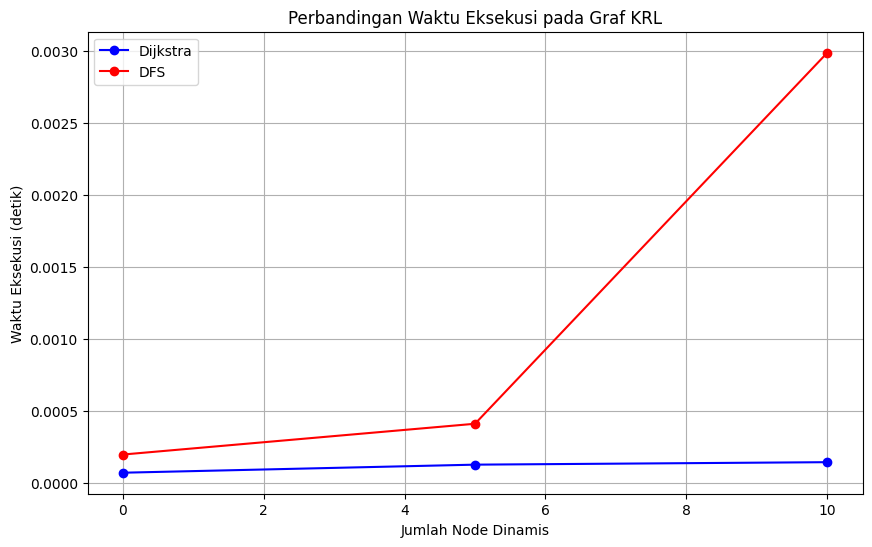

In [308]:
# Visualisasi Hasil Perbandingan Waktu Eksekusi
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, dijkstra_times, label='Dijkstra', marker='o', color='blue')
plt.plot(input_sizes, dfs_times, label='DFS', marker='o', color='red')
plt.xlabel('Jumlah Node Dinamis')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi pada Graf KRL')
plt.legend()
plt.grid()
plt.show()
